## 1. Reading Dataset and Important Libraries

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Code to display all rows and columns in the output 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
# Read the data from the file to df dataframe
df = pd.read_csv('day.csv')

In [4]:
# Check the header of the file
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the shape of the file
df.shape

(730, 16)

In [6]:
# Check the information of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### All columns have 730 number of rows, hence there is no missing/null value in any column

In [7]:
# Cross veryfying that all columns have no missing/null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Check the datatypes of all the columns of the file
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
# Let us describe all the columns which have integer values.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Cleaning of the dataset

In [10]:
# From the data dictionary of the data set, it is evident that few of the columns are not required in our analysis.
# casual and registered columns can be ignored as our objective is to find/predict total number of bikes regardless of category.
# So, let us drop those columns
df.drop(['instant','dteday','casual','registered'], axis = 1 , inplace = True)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# As per the data dictionary, there are few categorical columns. Let us make a list of these columns for future use
categorical_cols = ['season', 'mnth', 'weekday', 'workingday', 'weathersit']

# As per the data dictionary, there are few numerical columns. Let us make a list of these columns for future use
numerical_cols = ['temp', 'atemp' , 'hum' , 'windspeed' , 'cnt']

In [13]:
# Let us now create textual categories based on numeric categories (as per data dictionary) for better visualization.
df.season = df.season.map({ 1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

df.mnth = df.mnth.map({ 1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'June' , 7:'July' , 8:'Aug' , 9:'Sep' , 10:'Oct' , 11:'Nov' , 12:'Dec'})

df.weekday = df.weekday.map({ 0:'Sun' , 1:'Mon' , 2:'Tue' , 3:'Wed' , 4:'Thu' , 5:'Fri' , 6:'Sat'})

df.weathersit = df.weathersit.map({ 1:'Clear' , 2:'Misty' , 3:'Light_Snowrain' , 4:'Heavy_Snowrain'})

df.workingday = df.workingday.map({ 1:'Yes' , 0:'No' })

In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,Yes,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,Yes,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## 3. EDA

<Figure size 720x504 with 0 Axes>

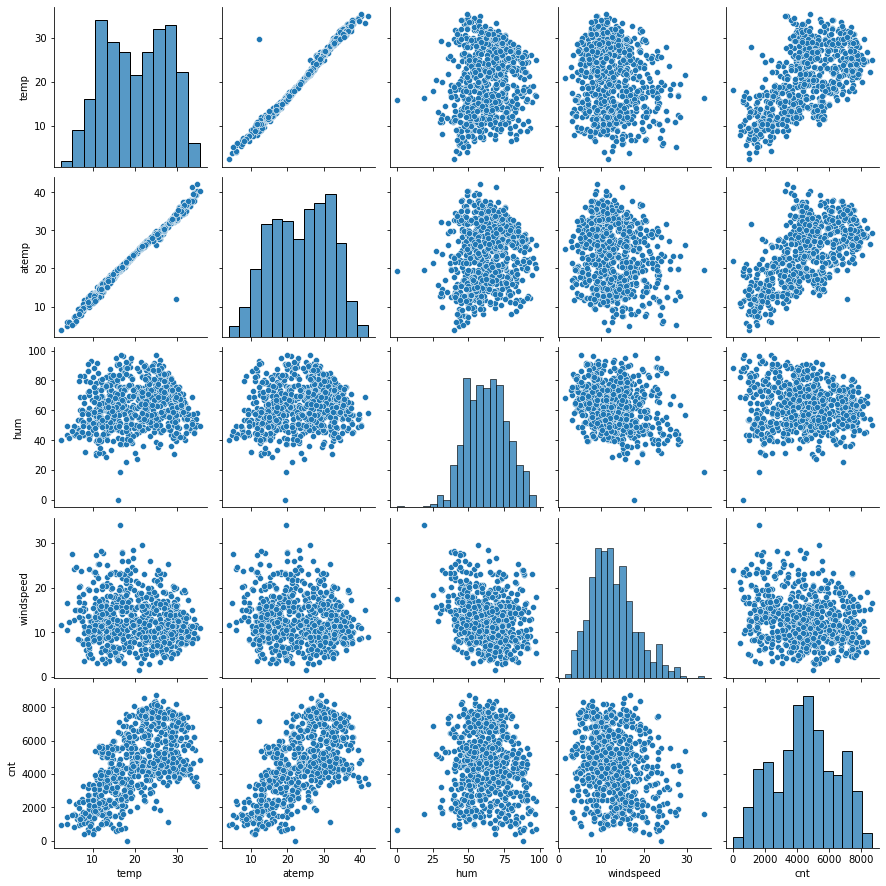

In [16]:
# Let us visualize all numerical variable using pairplot
plt.figure(figsize = (10,7))
#plt.labels('Pairplot of all numerical variable')
sns.pairplot(df[numerical_cols])
plt.show()

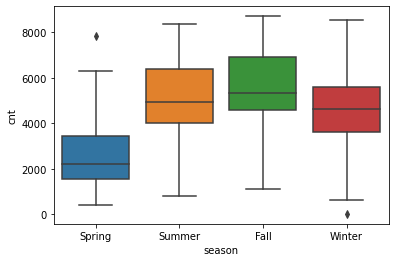

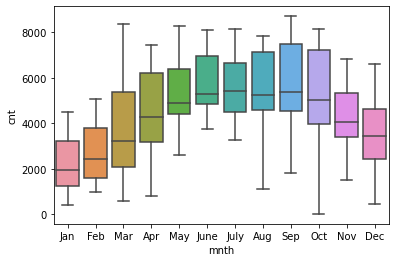

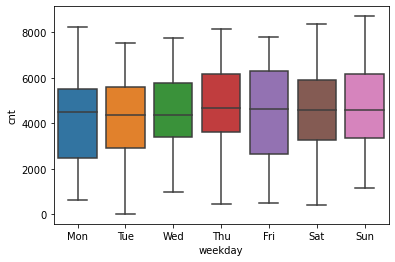

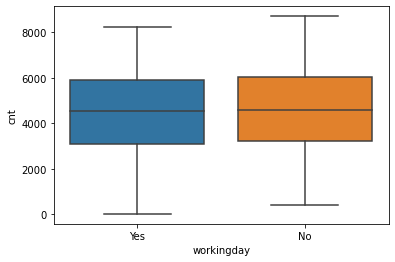

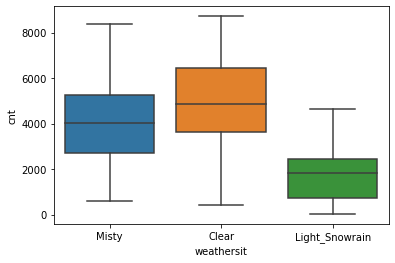

In [17]:
# Let us now visualize all the categorical columns with the help of boxplot
for i in categorical_cols:
    sns.boxplot(x = i, y = 'cnt', data = df)
    plt.show()

## 4. Data Preparation

### 4.1 Encoding

In [18]:
# Let us now encode all the categorical (yes/no) variables to 0/1 
df.workingday = df.workingday.map({'Yes' : 1 , 'No' : 0})

In [19]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# Encoding all other categorical variables i.e. creating dummy variables 
months = pd.get_dummies(df.mnth,drop_first=True)
weekdays = pd.get_dummies(df.weekday,drop_first=True)
weathersit = pd.get_dummies(df.weathersit,drop_first=True)
seasons = pd.get_dummies(df.season,drop_first=True)

In [21]:
# Concatinating the original dataframe with all above created dummy variable dataset and storing it in a new dataframe
df1 = pd.concat([df,months,weekdays,weathersit,seasons],axis=1)

In [22]:
# Let us now drop all the columns for which dummy variables have been created
df1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [23]:
# Chechking shape and info of the newly created dataframe
print(df1.shape)
print(df1.info())

(730, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  July            730 non-null    uint8  
 13  June            730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-n

### 4.2 Train-Test Split

In [24]:
# Importing important libraries
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [25]:
# Splitting the data into train and test
np.random.seed(0)
df_train , df_test = train_test_split(df1 , train_size = 0.7 , random_state = 100)

In [26]:
print(df_train.shape , df_test.shape)

(510, 30) (220, 30)


### 4.3 Rescaling

In [27]:
# Instantiate the Object
scaler=MinMaxScaler()

# Fit all the numerical variables
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

In [28]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snowrain,Misty,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [29]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.4 Training the Model

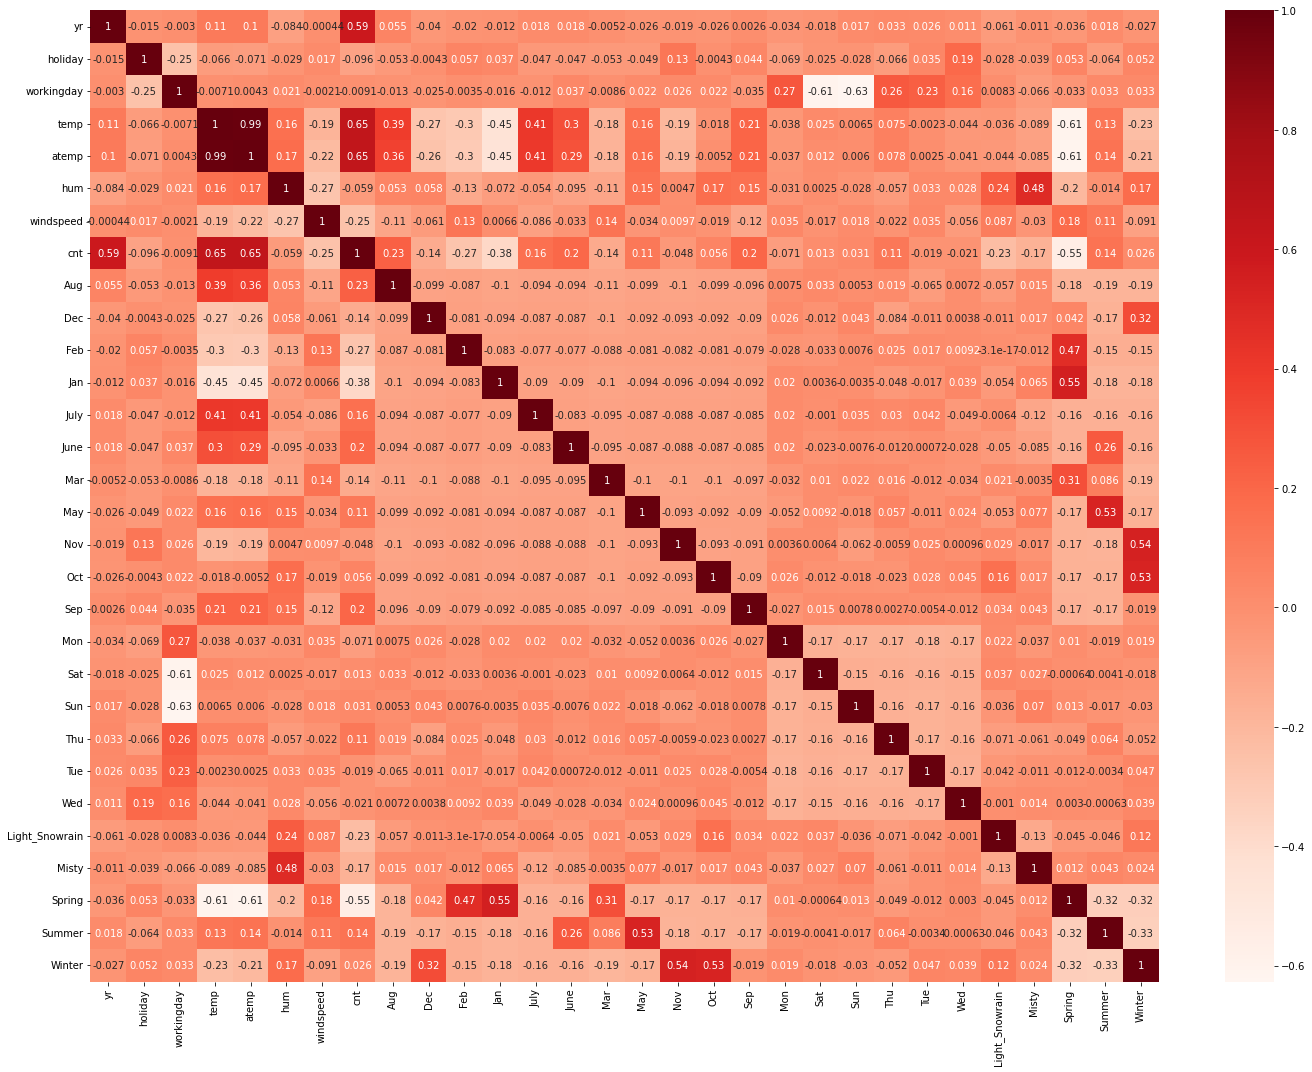

In [30]:
# Let us look at the correlation matrix to find out how variables are correlated to each other.
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True,cmap='Reds')
plt.tight_layout()
plt.show()

In [31]:
# Let us now split X_train and y_train
y_train=df_train.pop("cnt")
X_train=df_train

In [32]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light_Snowrain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
# Let us now create X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## 5 Data Modelling

In [35]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a model
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.15e-189
Time:                        08:46:19   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,Spring,4.37
14,Winter,4.06
13,Summer,2.82
11,Misty,2.32
0,yr,2.09
8,Nov,1.85
6,Jan,1.75


In [37]:
# Removing the variable 'hum' based on high VIF
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [38]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.75e-186
Time:                        08:46:28   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,Winter,2.95
11,Spring,2.89
12,Summer,2.24
0,yr,2.07
7,Nov,1.81
5,Jan,1.66
6,July,1.59
10,Misty,1.57


In [40]:
# Removing the variable 'windspeed' based on high VIF (We are not removing temp variable as it can be an important factor)
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [41]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.35e-179
Time:                        08:46:33   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1837      0.032      5.

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
12,Winter,2.81
10,Spring,2.12
0,yr,2.07
11,Summer,1.94
6,Nov,1.79
4,Jan,1.65
5,July,1.59
9,Misty,1.56
3,Dec,1.47


In [43]:
# Removing the variable 'summer' based on p value 
X_train_new = X_train_new.drop(["Summer"], axis = 1)

In [44]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.47e-179
Time:                        08:46:37   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2196      0.023      9.

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
11,Winter,2.53
0,yr,2.05
10,Spring,1.93
6,Nov,1.79
4,Jan,1.65
9,Misty,1.53
3,Dec,1.46
5,July,1.34
7,Sep,1.20


In [46]:
# Removing the variable 'Jan' based on p value 
X_train_new = X_train_new.drop(["Jan"], axis = 1)

In [47]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.70e-180
Time:                        08:46:41   Log-Likelihood:                 481.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     498   BIC:                            -888.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2081      0.023      9.

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
10,Winter,2.51
0,yr,2.05
5,Nov,1.79
8,Misty,1.51
3,Dec,1.42
4,July,1.33
9,Spring,1.29
6,Sep,1.20
7,Light_Snowrain,1.07


In [49]:
# Removing the variable 'Dec' based on p value 
X_train_new = X_train_new.drop(["Dec"], axis = 1)

In [50]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.18e-180
Time:                        08:46:45   Log-Likelihood:                 480.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     499   BIC:                            -892.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2000      0.022      8.

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
9,Winter,1.89
4,Nov,1.58
7,Misty,1.51
3,July,1.33
8,Spring,1.25
5,Sep,1.20
1,holiday,1.06
6,Light_Snowrain,1.06


In [52]:
# Removing the variable 'Nov' based on p value 
X_train_new = X_train_new.drop(["Nov"], axis = 1)

In [53]:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train,X_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.25e-181
Time:                        08:46:49   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1952      0.022      8.

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
6,Misty,1.51
3,July,1.33
8,Winter,1.33
7,Spring,1.25
4,Sep,1.19
5,Light_Snowrain,1.06
1,holiday,1.04


In [55]:
# The above created model looks good, as there is VERY LOW Multicollinearity between the predictors; 
# and the p-values for all the predictors seems to be significant. 
# So let us consider this as our final model.

## 6. Residual Analysis

In [56]:
y_train_pred = lr6.predict(X_train_lm6)
res = y_train - y_train_pred

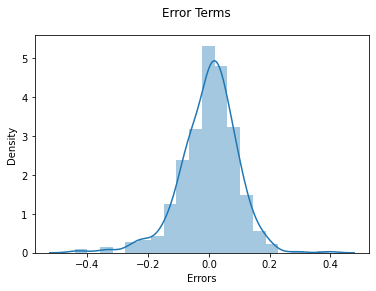

In [57]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                
plt.xlabel('Errors')      
plt.show()

## 7. Prediction on Test Set

### a. Applying Scaling on Test Set

In [58]:
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snowrain,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### b. Splitting into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

### c. Making Predictions

In [60]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   temp            220 non-null    float64
 4   July            220 non-null    uint8  
 5   Sep             220 non-null    uint8  
 6   Light_Snowrain  220 non-null    uint8  
 7   Misty           220 non-null    uint8  
 8   Spring          220 non-null    uint8  
 9   Winter          220 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.9 KB


In [61]:
# Making predictions using the final model (lr7)

y_pred = lr7.predict(X_test_lm7)

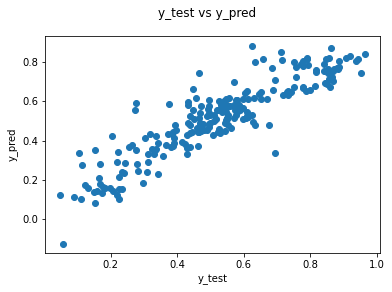

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')       
plt.xlabel('y_test')                    
plt.ylabel('y_pred') 
plt.show()

### R Squared value for test

In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8096078487662725

### Adjusted R squared value

In [64]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8014481851419698

# Observations
1. Train R2 = 0.82
2. Train adjusted R2 = 0.81
3. Test R2 = 0.809
4. Test adjusted R2 = 0.801

## This model seems to be a good model

### Equation of the best fit Model is:

### Inferences:

- Company should consider 'temp', 'yr', 'sep', 'winter' variables utmost importance in order to achieve maximum booking and make the company more profitable.